## K Nearest Neightbors

In [23]:
# Key intuition notes: if you have a new data point scattered between two categories of independent variables, how we can determine what category the new data point will belong to? 
# KNN find the euclidean distance between key points, accoriding to the K selected, and the new data point of interest
# The most common K is K=5
# SUMMARY: Take the k=5 nearest neightbors of the new data point, according to the shortest Euclidean distance
# The category is defined by the category of the greatest number of neighbors 

In [2]:
# Importing the key libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Import the dataset of choice which is the same as a the logistic regression dataset
dataset = pd.read_csv("../logistic-regression/data/social_network_ads.csv")
dataset.shape

(400, 5)

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [8]:
# Split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [10]:
# Scale features so that they're on the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# A note about the class: n_neighbors: default = 5, weight, algorithim, leaf_size, metric, p 
# Choosing the Euclidean distance as a basis for the model
# Note that paramters were pulled from documentation
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric= "minkowski", p = 2)

In [12]:
# Fit the classifier to the training set using the KNN class
# Using the fit method
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_pred = classifier.predict(X_test)

## Establishing the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
# 7 total incorrect predictions according to the y_test and y_train vectors
# 93 total correct predictions according to the same vectors
print(cm)

[[64  4]
 [ 3 29]]


## Visualizing K-Nearest-Neighbors

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


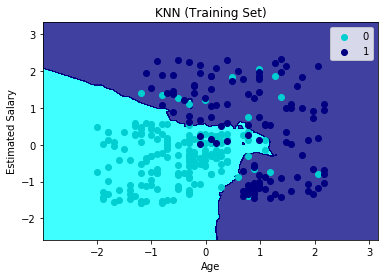

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
           alpha =0.75, cmap =ListedColormap(('aqua','navy')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set==j,1],
               c= ListedColormap(('darkturquoise','navy'))(i), label=j)

plt.title('KNN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [19]:
# A note on the interpretation above - KNN classified most of the users that did not purchase in the aqua color 
# There are some incorrect predictions noted as the navy blue data points in the aqua predictive region

### Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


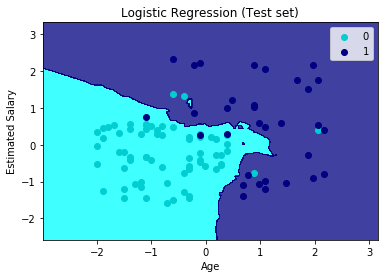

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkturquoise', 'navy'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [21]:
# The regions are the same, the regions are generated from the learning of the algorithim on the training dataset
# Most of the navy points are in the navy region, which is a good sign 
# KNN is a nonlinear classifier, it can separate the data as it's nonlinear

In [22]:
# Many thanks to SuperDataScience and the sklearn documentation